<a href="https://colab.research.google.com/github/EDequidt/tp_image_deeplearningynov/blob/master/Yolov3_custom.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Configuration darknet

In [1]:
# clone darknet repo
!git clone https://github.com/AlexeyAB/darknet

Cloning into 'darknet'...
remote: Enumerating objects: 13456, done.
remote: Total 13456 (delta 0), reused 0 (delta 0), pack-reused 13456
Receiving objects: 100% (13456/13456), 11.99 MiB | 18.83 MiB/s, done.
Resolving deltas: 100% (9197/9197), done.


In [2]:
%cd darknet
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

/content/darknet


In [0]:
!make

In [0]:
cd ..

/content


In [0]:
# define helper functions
def imShow(path):
  import cv2
  import matplotlib.pyplot as plt
  %matplotlib inline

  image = cv2.imread(path)
  height, width = image.shape[:2]
  resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

  fig = plt.gcf()
  fig.set_size_inches(18, 10)
  plt.axis("off")
  plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
  plt.show()


# Constitution du dataset d'animaux à partir d'OpenImage
Recuperation des images et labels
On utilisera les 5 classes suivantes: Zebre, Elephant, Hippopotame, Girafe, et Tigre

In [0]:
!git clone https://github.com/theAIGuysCode/OIDv4_ToolKit.git

Cloning into 'OIDv4_ToolKit'...
remote: Enumerating objects: 22, done.
remote: Counting objects: 100% (22/22), done.
remote: Compressing objects: 100% (21/21), done.
remote: Total 444 (delta 9), reused 1 (delta 0), pack-reused 422
Receiving objects: 100% (444/444), 34.09 MiB | 21.43 MiB/s, done.
Resolving deltas: 100% (155/155), done.


In [0]:
cd OIDv4_ToolKit/

/content/OIDv4_ToolKit


In [0]:
pip install -r requirements.txt

In [0]:
cd OIDv4_ToolKit/

/content/OIDv4_ToolKit


In [0]:
!python main.py downloader --classes Elephant Giraffe Hippopotamus Tiger Zebra --type_csv train --limit 300 --multiclasses 1


		   ___   _____  ______            _    _    
		 .'   `.|_   _||_   _ `.         | |  | |   
		/  .-.  \ | |    | | `. \ _   __ | |__| |_  
		| |   | | | |    | |  | |[ \ [  ]|____   _| 
		\  `-'  /_| |_  _| |_.' / \ \/ /     _| |_  
		 `.___.'|_____||______.'   \__/     |_____|
	

             _____                    _                 _             
            (____ \                  | |               | |            
             _   \ \ ___  _ _ _ ____ | | ___   ____  _ | | ____  ____ 
            | |   | / _ \| | | |  _ \| |/ _ \ / _  |/ || |/ _  )/ ___)
            | |__/ / |_| | | | | | | | | |_| ( ( | ( (_| ( (/ /| |    
            |_____/ \___/ \____|_| |_|_|\___/ \_||_|\____|\____)_|    
                                                          
        
    [INFO] | Downloading ['Elephant', 'Giraffe', 'Hippopotamus', 'Tiger', 'Zebra'] together.
   [ERROR] | Missing the class-descriptions-boxable.csv file.
[DOWNLOAD] | Do you want to download the missing file? [Y/n] Y
...

In [0]:
!python convert_annotations.py

Currently in subdirectory: train
Converting annotations for class:  Elephant_Giraffe_Hippopotamus_Tiger_Zebra
100% 1495/1495 [00:33<00:00, 44.65it/s]


In [0]:
rm -r OID/Dataset/train/Elephant_Giraffe_Hippopotamus_Tiger_Zebra/Label/

In [0]:
from google.colab import files
# zip
!zip -r animals.zip /content/OIDv4_ToolKit/OID/Dataset/train/Elephant_Giraffe_Hippopotamus_Tiger_Zebra
#Download files
files.download('animals.zip')

In [14]:
cd /content/drive/My Drive

/content/drive/My Drive


In [0]:
!cp obj.zip /content/

In [0]:
!cp /mydrive/My Drive/obj.zip ../

In [0]:
!unzip /content/obj.zip -d /content/darknet/data/

In [4]:
!wget http://pjreddie.com/media/files/darknet53.conv.74

--2020-05-13 09:27:52--  http://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://pjreddie.com/media/files/darknet53.conv.74 [following]
--2020-05-13 09:27:52--  https://pjreddie.com/media/files/darknet53.conv.74
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M   196KB/s    in 17m 34s 

2020-05-13 09:45:28 (150 KB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



In [19]:
cd /content/darknet/

/content/darknet


# Execution du script qui permet de generer train.txt

In [0]:
!python generate_train.py

# Train detector
Necessite .data, .names, train.txt, imgs, labels, .cfg

In [27]:
!./darknet detector train data/animals.data cfg/yolov3_custom2.cfg darknet53.conv.74 -dont_show

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 82 Avg (IOU: 0.888884, GIOU: 0.887562), Class: 0.999683, Obj: 0.964839, No Obj: 0.004782, .5R: 1.000000, .75R: 1.000000, count: 5, class_loss = 0.005489, iou_loss = 0.079608, total_loss = 0.085097 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 94 Avg (IOU: 0.753189, GIOU: 0.753189), Class: 0.998887, Obj: 0.084366, No Obj: 0.000121, .5R: 1.000000, .75R: 1.000000, count: 1, class_loss = 0.310467, iou_loss = 0.066723, total_loss = 0.377191 
v3 (mse loss, Normalizer: (iou: 0.75, cls: 1.00) Region 106 Avg (IOU: 0.000000, GIOU: 0.000000), Class: 0.000000, Obj: 0.000000, No Obj: 0.000000, .5R: 0.000000, .75R: 0.000000, count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 

 6629: 0.137793, 0.176715 avg loss, 0.001000 rate, 4.025550 seconds, 424256 images, 3.005305 hours left
Loaded: 0.000043 seconds
v3 (mse loss, Normalizer: (io

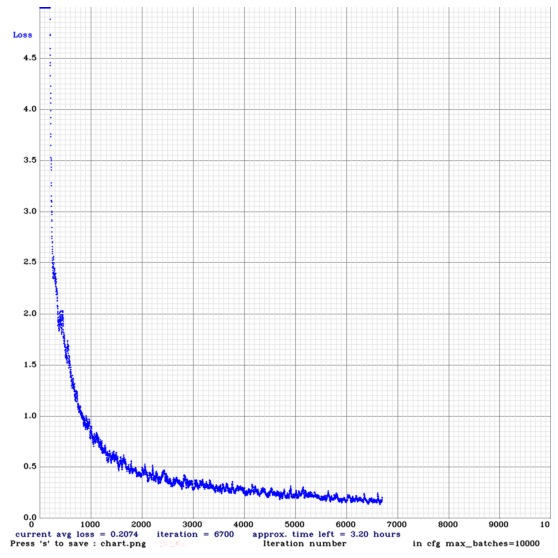

In [29]:
imShow('chart.png')

In [30]:
!dir

3rdparty		  darknet53.conv.74	  Makefile
backup			  DarknetConfig.cmake.in  net_cam_v3.sh
build			  darknet.py		  obj
build.ps1		  darknet_video.py	  README.md
build.sh		  data			  results
cfg			  generate_train.py	  scripts
chart.png		  image_yolov2.sh	  src
chart_yolov3_custom2.png  image_yolov3.sh	  video_v2.sh
cmake			  include		  video_yolov3.sh
CMakeLists.txt		  json_mjpeg_streams.sh
darknet			  LICENSE


In [31]:
# need to set our custom cfg to test mode 
%cd cfg
!sed -i 's/batch=64/batch=1/' yolov3_custom2.cfg
!sed -i 's/subdivisions=16/subdivisions=1/' yolov3_custom2.cfg
%cd ..

/content/darknet/cfg
/content/darknet


In [32]:
cd /content/drive/My\ Drive

/content/drive/My Drive


In [0]:
!cp -r photos_animaux/ /content/

In [37]:
cd /content/darknet/

/content/darknet


In [0]:
!sudo apt install dos2unix

In [43]:
!dos2unix ./data/animals.data
!dos2unix ./data/animals.names

dos2unix: converting file ./data/animals.data to Unix format...
dos2unix: ./data/animals.names: No such file or directory
dos2unix: Skipping ./data/animals.names, not a regular file.


# Test du detector sur plusieurs images

In [0]:

# custom detector
!./darknet detector test data/animals.data cfg/yolov3_custom2.cfg /content/darknet/backup/yolov3_custom2_6000.weights /content/photos_animaux/girafe1.jpg -thresh 0.3

In [0]:
!mv predictions.jpg girafe1.jpg

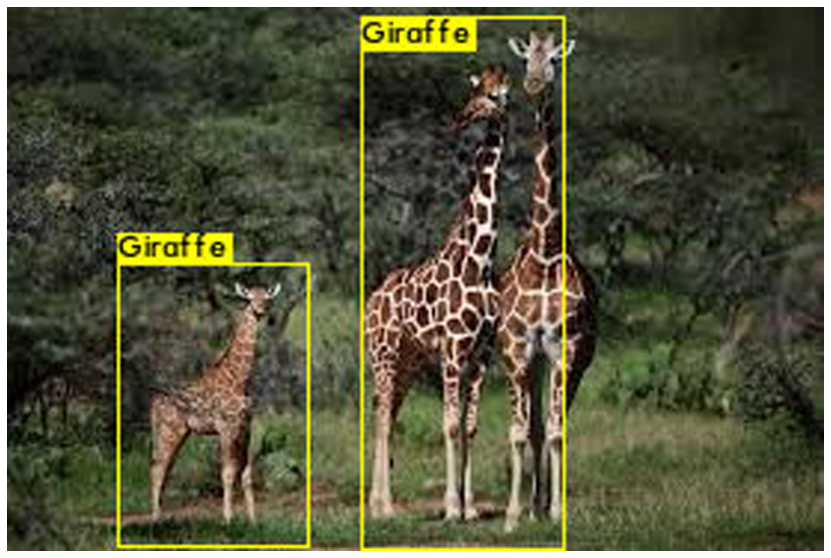

In [60]:
imShow('girafe1.jpg')

In [0]:
!./darknet detector test data/animals.data cfg/yolov3_custom2.cfg /content/darknet/backup/yolov3_custom2_6000.weights /content/photos_animaux/girafe2.jpg -thresh 0.3


In [0]:
!mv predictions.jpg girafe2.jpg

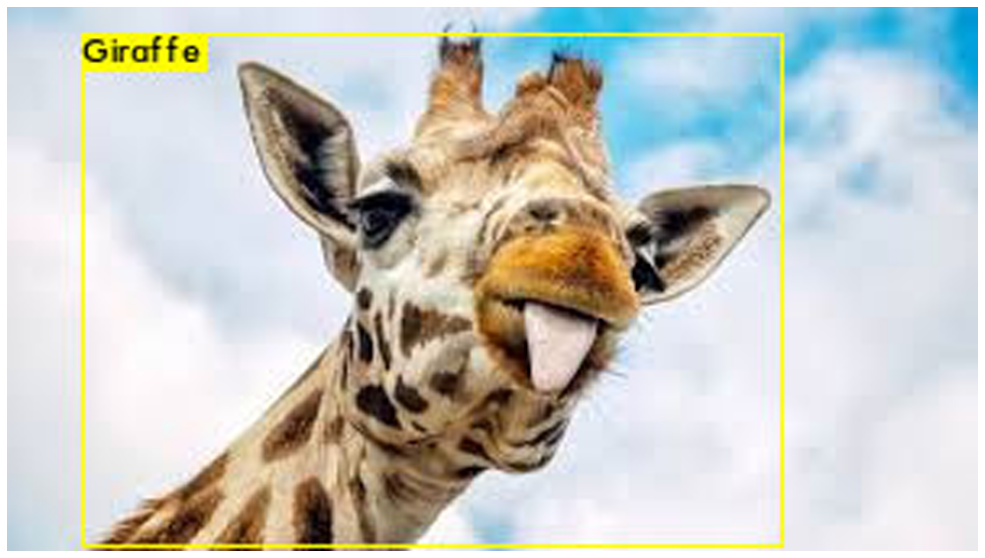

In [64]:
imShow('girafe2.jpg')

In [0]:
!./darknet detector test data/animals.data cfg/yolov3_custom2.cfg /content/darknet/backup/yolov3_custom2_6000.weights /content/photos_animaux/tigre1.jpg -thresh 0.3

In [0]:
!mv predictions.jpg tigre1.jpg

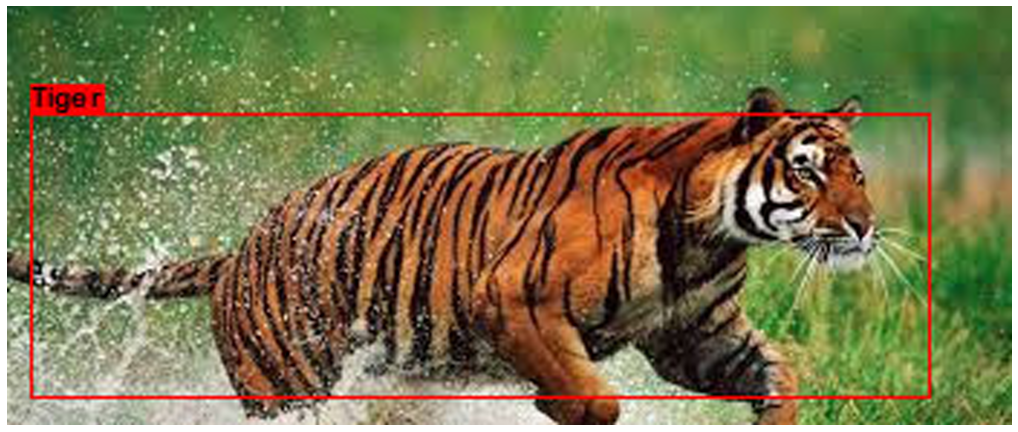

In [67]:
imShow('tigre1.jpg')

In [0]:
!./darknet detector test data/animals.data cfg/yolov3_custom2.cfg /content/darknet/backup/yolov3_custom2_6000.weights /content/photos_animaux/tigre2.jpg -thresh 0.3

In [0]:
!mv predictions.jpg tigre2.jpg

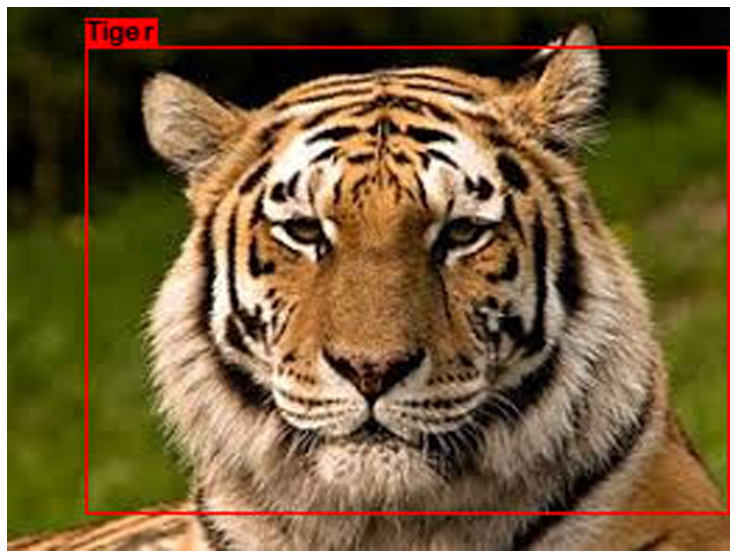

In [70]:
imShow('tigre2.jpg')

In [0]:
!./darknet detector test data/animals.data cfg/yolov3_custom2.cfg /content/darknet/backup/yolov3_custom2_6000.weights /content/photos_animaux/hipo1.jpg -thresh 0.3

In [0]:
!mv predictions.jpg hipo1.jpg

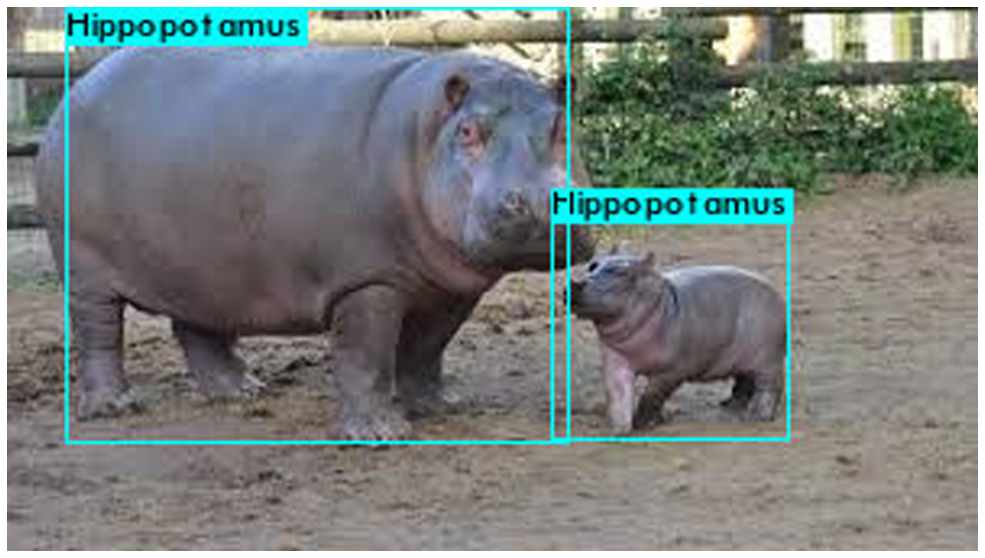

In [73]:
imShow('hipo1.jpg')

In [0]:
!./darknet detector test data/animals.data cfg/yolov3_custom2.cfg /content/darknet/backup/yolov3_custom2_6000.weights /content/photos_animaux/hipo2.jpg -thresh 0.3

In [0]:
!mv predictions.jpg hipo2.jpg

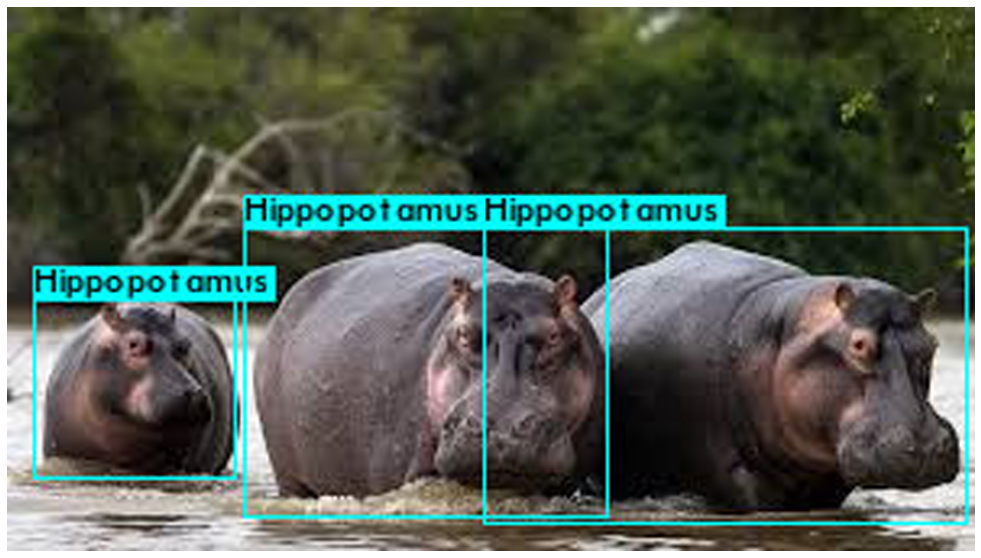

In [76]:
imShow('hipo2.jpg')

In [0]:
!./darknet detector test data/animals.data cfg/yolov3_custom2.cfg /content/darknet/backup/yolov3_custom2_6000.weights /content/photos_animaux/elephant1.jpg -thresh 0.3

In [0]:
!mv predictions.jpg elephant1.jpg

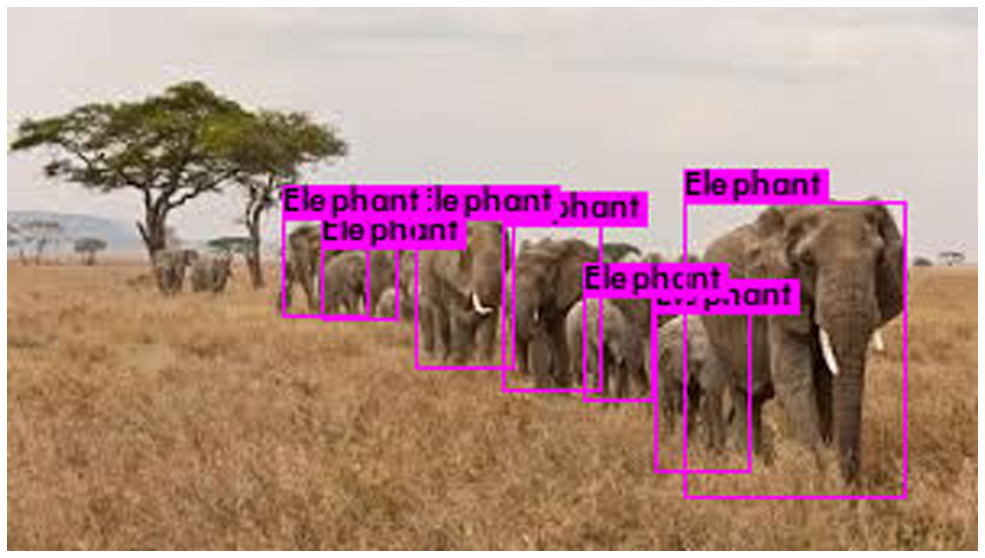

In [79]:
imShow('elephant1.jpg')

In [0]:
!./darknet detector test data/animals.data cfg/yolov3_custom2.cfg /content/darknet/backup/yolov3_custom2_6000.weights /content/photos_animaux/elephant2.jpg -thresh 0.3

In [0]:
!mv predictions.jpg elephant2.jpg

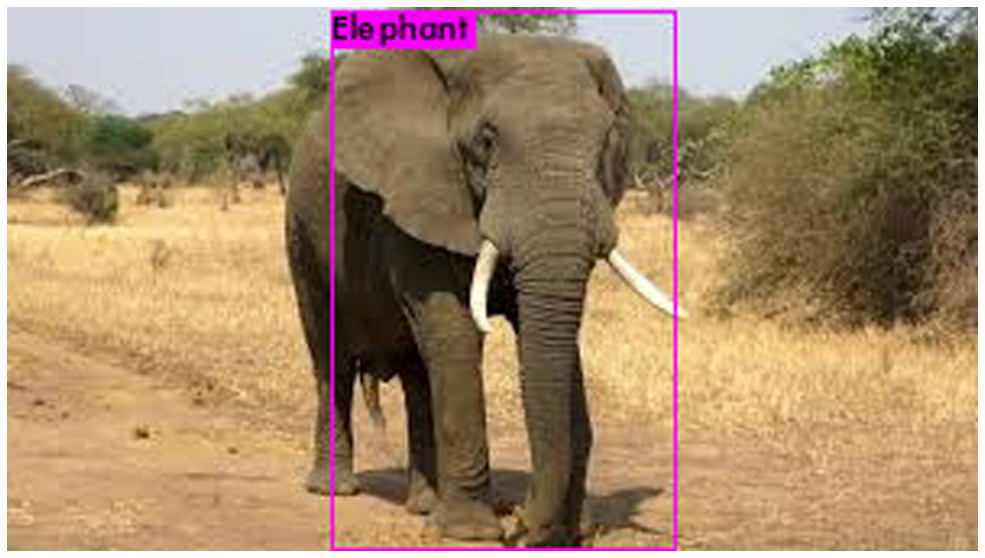

In [82]:
imShow('elephant2.jpg')

In [0]:
!./darknet detector test data/animals.data cfg/yolov3_custom2.cfg /content/darknet/backup/yolov3_custom2_6000.weights /content/photos_animaux/zebre.jpg -thresh 0.3

In [0]:
!mv predictions.jpg zebre1.jpg

In [0]:
imShow('zebre1.jpg')

In [0]:
!./darknet detector test data/animals.data cfg/yolov3_custom2.cfg /content/darknet/backup/yolov3_custom2_6000.weights /content/photos_animaux/zebre2.jpg -thresh 0.3

In [0]:
!mv predictions.jpg zebre2.jpg

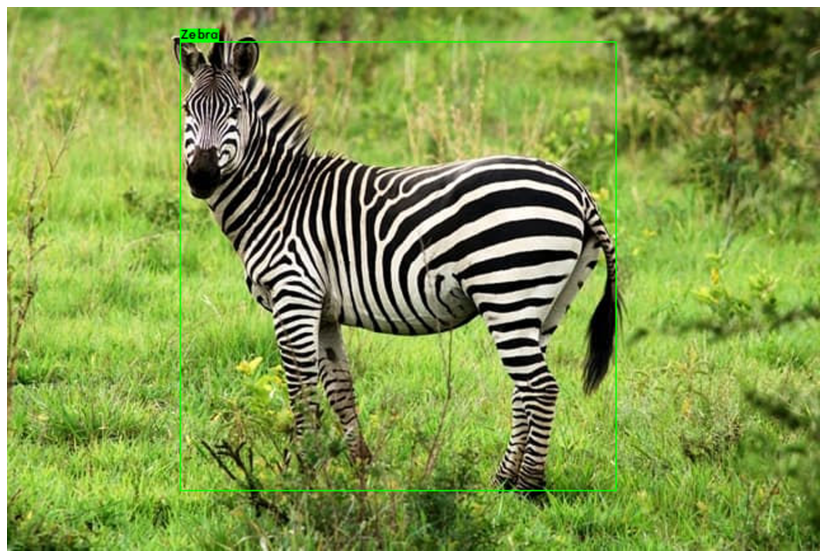

In [88]:
imShow('zebre2.jpg')